# Flight-based Counting Operations

In [1]:
import pandas as pd 
df = pd.read_csv("routes/cs_2023-04-01.csv")
df.head()
# df columns: id	from_time	to_time	from_lat	from_lon	to_lat	to_lon	from_alt	to_alt	from_speed	to_speed

,id,from_time,to_time,from_lat,from_lon,to_lat,to_lon,from_alt,to_alt,from_speed,to_speed
0,000042HMJ225,1.680349e+09,1.680365e+09,42.941666,14.271751,46.177048,14.543554,11521.44,1569.72,0.232055,0.139918
1,000042HMJ225,1.680365e+09,1.680383e+09,46.177048,14.543554,35.847458,14.489973,1569.72,114.30,0.139918,0.000000
2,001260TC T124,1.680347e+09,1.680347e+09,40.781622,26.631546,40.737488,26.461792,4297.68,4876.80,0.031492,0.031096
3,001260TC T124,1.680347e+09,1.680348e+09,40.737488,26.461792,40.717529,26.377625,4876.80,5242.56,0.031096,0.029558
4,001260TC T124,1.680348e+09,1.680348e+09,40.717529,26.377625,40.729298,26.257761,5242.56,5486.40,0.029558,0.046496


(array([3.1500e+03, 1.6601e+04, 1.6633e+04, 1.6967e+04, 1.1434e+04,
        8.0430e+03, 6.0280e+03, 5.8420e+03, 5.8140e+03, 5.8490e+03,
        5.2370e+03, 3.5140e+03, 3.2420e+03, 2.9450e+03, 2.7100e+03,
        2.4640e+03, 2.3150e+03, 2.2410e+03, 1.9840e+03, 1.9440e+03,
        2.0130e+03, 2.0370e+03, 2.0640e+03, 1.9930e+03, 1.9820e+03,
        1.9280e+03, 2.0360e+03, 2.1840e+03, 2.1720e+03, 2.4490e+03,
        3.2940e+03, 4.5610e+03, 6.2410e+03, 7.7160e+03, 7.2210e+03,
        6.0510e+03, 2.8550e+03, 1.7680e+03, 5.2600e+02, 1.4000e+02,
        1.0100e+02, 7.4000e+01, 3.6000e+01, 2.1000e+01, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

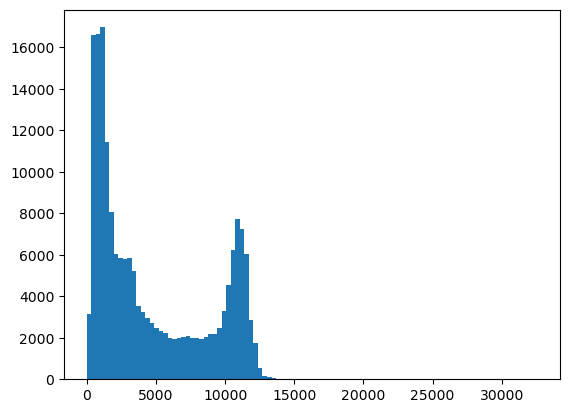

In [2]:
from matplotlib import pyplot as plt
plt.hist(df['from_alt'], bins=100)

In [3]:
def get_window_range(absolute_start, window_size, window_id):
    window_start = absolute_start + window_id * window_size
    window_end = window_start + window_size
    return window_start, window_end

In [4]:
from_time_range = df['from_time'].min(), df['from_time'].max()
to_time_range = df['to_time'].min(), df['to_time'].max()
time_range = from_time_range[0], to_time_range[1]
print(f'Time range: {time_range[0]} - {time_range[1]}')

# First window range
window_size = 15 * 60 # 15 minutes 
window_id = 0
window_start, window_end = get_window_range(time_range[0], window_size, window_id)
print(f'Window {window_id}: {window_start} - {window_end}')

# Count flights with segments intersecting each time window
def count_flights_in_window(df, window_start, window_end):
    """Count flights that have at least one segment intersecting the given time window"""
    
    # A segment intersects the window if:
    # 1. Segment starts during window (from_time in window)
    # 2. Segment ends during window (to_time in window) 
    # 3. Segment spans entire window (starts before and ends after)
    
    flights_in_window = df[
        ((df['from_time'] >= window_start) & (df['from_time'] < window_end)) |  # Starts in window
        ((df['to_time'] > window_start) & (df['to_time'] <= window_end)) |      # Ends in window
        ((df['from_time'] <= window_start) & (df['to_time'] >= window_end))     # Spans window
    ]
    
    # Get unique flight IDs
    return len(flights_in_window['id'].unique()), flights_in_window

# Count flights in first window
num_flights, flights_in_window = count_flights_in_window(df, window_start, window_end)
print(f'Number of flights in window {window_id}: {num_flights}')



Time range: 1680307259.0 - 1680479999.0
Window 0: 1680307259.0 - 1680308159.0
Number of flights in window 0: 386


In [5]:
flights_in_window.head()

,id,from_time,to_time,from_lat,from_lon,to_lat,to_lon,from_alt,to_alt,from_speed,to_speed
401,0101DCMSR780,1.680307e+09,1.680307e+09,46.189223,14.530312,46.090347,14.681030,11750.04,11750.04,0.266526,0.266801
402,0101DCMSR780,1.680307e+09,1.680314e+09,46.090347,14.681030,34.706881,27.830486,11750.04,11993.88,0.266801,0.000000
429,0101DEMSR981,1.680307e+09,1.680307e+09,36.756500,26.520767,36.862483,26.455675,10507.98,10507.98,0.218873,0.217558
430,0101DEMSR981,1.680307e+09,1.680321e+09,36.862483,26.455675,60.554034,1.133259,10507.98,10698.48,0.217558,0.000000
434,0101DFMSR986,1.680307e+09,1.680307e+09,36.094025,14.910908,36.068756,15.085258,12138.66,12138.66,0.265301,0.267600


In [6]:
import pandas as pd
import numpy as np
from math import floor
from tqdm import tqdm

def count_aircraft(df, trenches, lat_min, lat_max, lon_min, lon_max, cell_size, window_size):
    # Precompute grid boundaries
    lat_bounds = np.arange(lat_min, lat_max + cell_size, cell_size)
    lon_bounds = np.arange(lon_min, lon_max + cell_size, cell_size)
    
    # Dictionary to accumulate counts:
    # key: (window_start, alt_trench_idx, lat_idx, lon_idx), value: fractional count.
    counts = {}
    
    # Process each flight segment
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Counting aircraft"):
        seg_start = float(row['from_time'])
        seg_end   = float(row['to_time'])
        seg_duration = seg_end - seg_start
        if seg_duration <= 0:
            continue
        
        # Flight segment endpoints for position and altitude (assumed linear)
        lat0, lat1 = float(row['from_lat']), float(row['to_lat'])
        lon0, lon1 = float(row['from_lon']), float(row['to_lon'])
        alt0, alt1 = float(row['from_alt']), float(row['to_alt'])
        
        # Determine the 15-minute windows overlapping this segment.
        # The window boundaries are assumed to be multiples of window_size.
        # (If a flight starts at, say, 10:05, then the window containing it starts at 10:00.)
        window_start = floor(seg_start / window_size) * window_size
        
        while window_start < seg_end:
            window_end = window_start + window_size
            # Overlap of flight segment with current window.
            t0 = max(seg_start, window_start)
            t1 = min(seg_end, window_end)
            if t1 <= t0:
                window_start += window_size
                continue
            
            # Parameterize the flight segment in this window portion by tau in [0, 1].
            tau0 = (t0 - seg_start) / seg_duration
            tau1 = (t1 - seg_start) / seg_duration
            
            # Collect tau values that split the segment.
            taus = [tau0, tau1]
            
            # Helper: add tau value if within (tau0, tau1)
            def add_tau(t):
                if tau0 < t < tau1:
                    taus.append(t)
            
            # Find tau values where the flight crosses a latitude grid boundary.
            if lat1 != lat0:
                lat_seg_min = min(lat0, lat1)
                lat_seg_max = max(lat0, lat1)
                # Consider only grid boundaries that lie within the flight’s lat range.
                for b in lat_bounds:
                    if lat_seg_min < b < lat_seg_max:
                        t = (b - lat0) / (lat1 - lat0)
                        add_tau(t)
            
            # Similarly for longitude boundaries.
            if lon1 != lon0:
                lon_seg_min = min(lon0, lon1)
                lon_seg_max = max(lon0, lon1)
                for b in lon_bounds:
                    if lon_seg_min < b < lon_seg_max:
                        t = (b - lon0) / (lon1 - lon0)
                        add_tau(t)
            
            # And for altitude trench boundaries.
            if alt1 != alt0:
                # For each trench, check the lower and upper boundaries.
                for alt_lower, alt_upper in trenches:
                    # Check lower boundary
                    if (alt_lower - alt0) * (alt_lower - alt1) < 0:
                        t = (alt_lower - alt0) / (alt1 - alt0)
                        add_tau(t)
                    # Check upper boundary
                    if (alt_upper - alt0) * (alt_upper - alt1) < 0:
                        t = (alt_upper - alt0) / (alt1 - alt0)
                        add_tau(t)
            
            # Sort and remove duplicates
            taus = sorted(set(taus))
            
            # For each subinterval (where the flight is “in one cell and one altitude range”)
            for i in range(len(taus) - 1):
                tau_sub0, tau_sub1 = taus[i], taus[i+1]
                tau_mid = (tau_sub0 + tau_sub1) / 2.0
                
                # Compute mid–point of the flight path for this subinterval.
                lat_mid = lat0 + tau_mid * (lat1 - lat0)
                lon_mid = lon0 + tau_mid * (lon1 - lon0)
                alt_mid = alt0 + tau_mid * (alt1 - alt0)
                
                # Only count if within the area of interest.
                if not (lat_min <= lat_mid <= lat_max and lon_min <= lon_mid <= lon_max):
                    continue
                
                # Determine grid cell indices (integer indices).
                lat_idx = int((lat_mid - lat_min) / cell_size)
                lon_idx = int((lon_mid - lon_min) / cell_size)
                
                # Determine the altitude trench in which alt_mid lies.
                alt_trench_idx = None
                for idx_trench, (alt_low, alt_high) in enumerate(trenches):
                    if alt_low <= alt_mid < alt_high:
                        alt_trench_idx = idx_trench
                        break
                if alt_trench_idx is None:
                    # Flight altitude is not in any trench.
                    continue
                
                # Compute the time (in seconds) that the flight spent in this subinterval.
                dt = (tau_sub1 - tau_sub0) * seg_duration
                # The “weight” is the fraction of the 15‐minute window.
                weight = dt / window_size
                
                # Use (window_start, alt_trench_idx, lat_idx, lon_idx) as the key.
                key = (window_start, alt_trench_idx, lat_idx, lon_idx)
                counts[key] = counts.get(key, 0) + weight
            
            window_start += window_size
    
    return counts


In [7]:
# Define altitude trenches as a list of (min_alt, max_alt) tuples (in the same units as in the CSV).
altitude_trenches = [
    (7315.2, 8839.2),  # Lower En-Route (24,000 ft to 29,000 ft in meters)
    (8839.2, 10668.0),  # Upper En-Route, Lower RVSM (29,000 ft to 35,000 ft in meters)
    (10668.0, 21243.0)  # Upper En-Route, Upper RVSM (35,000 ft to 69,696 ft in meters)
]

# Suppose the CSV is saved as "flight_segments.csv"
result = count_aircraft(df, altitude_trenches,
                        lat_min=30.0, lat_max=72.0, lon_min=-15.0, lon_max=40.0,
                        cell_size=0.25, window_size=15 * 60)

Counting aircraft: 100%|██████████| 186427/186427 [00:15<00:00, 12037.51it/s]


In [19]:
# Function to plot aircraft count for a specific time window and altitude trench
def plot_aircraft_count(counts, window_idx, alt_trenches, alt_trench_idx, 
                        lat_min=30.0, lat_max=72.0, lon_min=-15.0, lon_max=40.0,
                        cell_size=0.25, cmap='viridis', figsize=(12, 10), window_size=15 * 60):
    """
    Plot the aircraft count for each grid cell for a specific time window and altitude trench.
    
    Parameters:
    -----------
    counts : dict
        Dictionary with keys (window_start, alt_trench_idx, lat_idx, lon_idx) and values as counts
    window_idx : int
        Index of the time window to plot
    alt_trench_idx : int
        Index of the altitude trench to plot
    lat_min, lat_max, lon_min, lon_max : float
        Boundaries of the area of interest
    cell_size : float
        Size of each grid cell in degrees
    cmap : str
        Colormap to use for the plot
    figsize : tuple
        Figure size
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from matplotlib.colors import LogNorm
    
    # Get all unique window_start values and sort them
    window_starts = sorted(set(key[0] for key in counts.keys()))
    
    if window_idx >= len(window_starts):
        raise ValueError(f"window_idx {window_idx} is out of range. Max index is {len(window_starts)-1}")
    
    window_start = window_starts[window_idx]
    
    # Calculate grid dimensions
    n_lat = int((lat_max - lat_min) / cell_size)
    n_lon = int((lon_max - lon_min) / cell_size)
    
    # Initialize grid with zeros
    grid = np.zeros((n_lat, n_lon))
    
    # Fill the grid with counts
    for key, count in counts.items():
        w_start, a_idx, lat_idx, lon_idx = key
        if w_start == window_start and a_idx == alt_trench_idx:
            if 0 <= lat_idx < n_lat and 0 <= lon_idx < n_lon:
                grid[lat_idx, lon_idx] = count
    
    # Create figure with Cartopy projection
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE, linestyle=':', edgecolor='white')
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='white')
    ax.add_feature(cfeature.LAND, alpha=0.1)
    ax.add_feature(cfeature.OCEAN, alpha=0.1)
    
    # Create a mesh grid for plotting
    lon_edges = np.linspace(lon_min, lon_max, n_lon + 1)
    lat_edges = np.linspace(lat_min, lat_max, n_lat + 1)
    
    # Plot the data using pcolormesh
    mesh = ax.pcolormesh(lon_edges, lat_edges, grid, cmap=cmap, 
                         transform=ccrs.PlateCarree(), 
                         vmin=0, vmax=grid.max())
    
    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, pad=0.01)
    cbar.set_label('Aircraft Count')
    
    # Format timestamp for title
    from datetime import datetime
    timestamp = datetime.fromtimestamp(window_start).strftime('%Y-%m-%d %H:%M:%S')
    timestamp_to = datetime.fromtimestamp(window_start + window_size).strftime('%Y-%m-%d %H:%M:%S')
    
    # Get altitude range for the selected trench
    altitude_trenches = alt_trenches 
    alt_min, alt_max = altitude_trenches[alt_trench_idx]
    
    # Set title and labels
    ax.set_title(f'Aircraft Count ({timestamp} - {timestamp_to})\nAltitude: {alt_min:.1f}m - {alt_max:.1f}m')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Set extent of the map
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    plt.tight_layout()
    return fig, ax


(<Figure size 1200x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aircraft Count (2023-04-01 02:00:00 - 2023-04-01 02:15:00)\nAltitude: 8839.2m - 10668.0m'}, xlabel='Longitude', ylabel='Latitude'>)

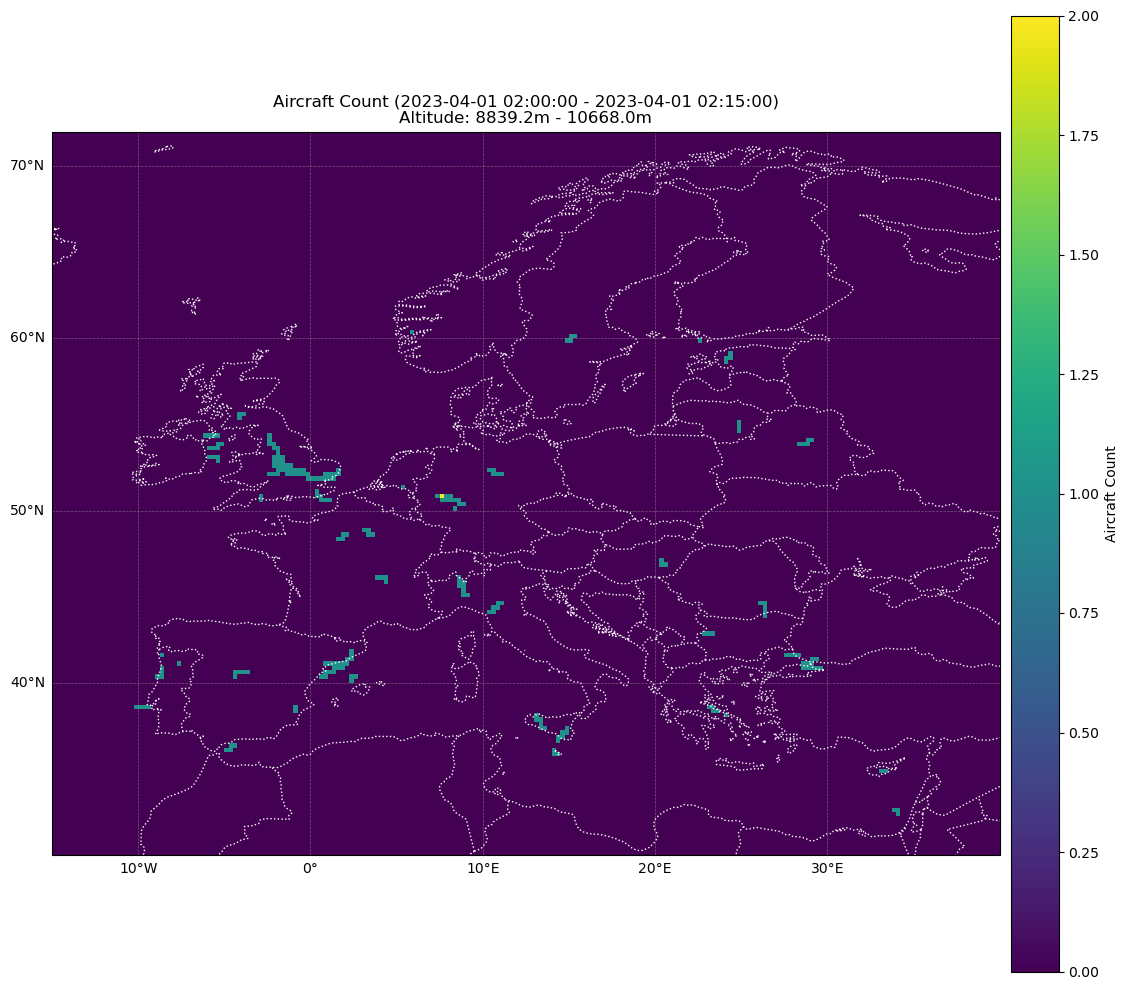

In [20]:
plot_aircraft_count(result, 0, altitude_trenches, 1)

# Returning maximum aircraft count within the window

In [10]:
import pandas as pd
import numpy as np
from math import floor

def merge_intervals(intervals):
    """
    Given a list of (start, end) intervals (assumed sorted by start),
    merge overlapping intervals and return the merged list.
    """
    if not intervals:
        return []
    intervals = sorted(intervals, key=lambda x: x[0])
    merged = [intervals[0]]
    for current in intervals[1:]:
        prev_start, prev_end = merged[-1]
        cur_start, cur_end = current
        if cur_start <= prev_end:  # Overlap
            merged[-1] = (prev_start, max(prev_end, cur_end))
        else:
            merged.append(current)
    return merged

def max_aircraft_count(df, trenches, lat_min, lat_max, lon_min, lon_max, cell_size, window_size):
    lat_bounds = np.arange(lat_min, lat_max + cell_size, cell_size)
    lon_bounds = np.arange(lon_min, lon_max + cell_size, cell_size)
    
    # Dictionary to accumulate time intervals.
    # Key: (window_start, alt_trench_idx, lat_idx, lon_idx)
    # Value: dict mapping flight id -> list of (t_start, t_end) intervals (seconds)
    intervals_dict = {}
    
    # Process each flight segment
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Counting aircraft"):
        flight_id = row['id']
        seg_start = float(row['from_time'])
        seg_end   = float(row['to_time'])
        seg_duration = seg_end - seg_start
        if seg_duration <= 0:
            continue
        
        lat0, lat1 = float(row['from_lat']), float(row['to_lat'])
        lon0, lon1 = float(row['from_lon']), float(row['to_lon'])
        alt0, alt1 = float(row['from_alt']), float(row['to_alt'])
        
        # Determine overlapping 15‑minute windows.
        window_start = floor(seg_start / window_size) * window_size
        while window_start < seg_end:
            window_end = window_start + window_size
            t0 = max(seg_start, window_start)
            t1 = min(seg_end, window_end)
            if t1 <= t0:
                window_start += window_size
                continue
            
            tau0 = (t0 - seg_start) / seg_duration
            tau1 = (t1 - seg_start) / seg_duration
            taus = [tau0, tau1]
            
            # Helper to add a tau value within (tau0, tau1)
            def add_tau(t):
                if tau0 < t < tau1:
                    taus.append(t)
            
            # Latitude grid boundaries
            if lat1 != lat0:
                lat_seg_min, lat_seg_max = min(lat0, lat1), max(lat0, lat1)
                for b in lat_bounds:
                    if lat_seg_min < b < lat_seg_max:
                        t_val = (b - lat0) / (lat1 - lat0)
                        add_tau(t_val)
            
            # Longitude grid boundaries
            if lon1 != lon0:
                lon_seg_min, lon_seg_max = min(lon0, lon1), max(lon0, lon1)
                for b in lon_bounds:
                    if lon_seg_min < b < lon_seg_max:
                        t_val = (b - lon0) / (lon1 - lon0)
                        add_tau(t_val)
            
            # Altitude trench boundaries
            if alt1 != alt0:
                for alt_lower, alt_upper in trenches:
                    # Check lower boundary
                    if (alt_lower - alt0) * (alt_lower - alt1) < 0:
                        t_val = (alt_lower - alt0) / (alt1 - alt0)
                        add_tau(t_val)
                    # Check upper boundary
                    if (alt_upper - alt0) * (alt_upper - alt1) < 0:
                        t_val = (alt_upper - alt0) / (alt1 - alt0)
                        add_tau(t_val)
            
            taus = sorted(set(taus))
            
            # Break the segment in this window into subintervals
            for i in range(len(taus) - 1):
                tau_sub0, tau_sub1 = taus[i], taus[i+1]
                tau_mid = (tau_sub0 + tau_sub1) / 2.0
                
                # Compute mid-point of the subinterval
                lat_mid = lat0 + tau_mid * (lat1 - lat0)
                lon_mid = lon0 + tau_mid * (lon1 - lon0)
                alt_mid = alt0 + tau_mid * (alt1 - alt0)
                
                if not (lat_min <= lat_mid <= lat_max and lon_min <= lon_mid <= lon_max):
                    continue
                
                # Determine grid cell indices
                lat_idx = int((lat_mid - lat_min) / cell_size)
                lon_idx = int((lon_mid - lon_min) / cell_size)
                
                # Determine altitude trench index
                alt_trench_idx = None
                for idx_trench, (alt_low, alt_high) in enumerate(trenches):
                    if alt_low <= alt_mid < alt_high:
                        alt_trench_idx = idx_trench
                        break
                if alt_trench_idx is None:
                    continue
                
                # Calculate the absolute start and end times for this subinterval
                t_sub_start = seg_start + tau_sub0 * seg_duration
                t_sub_end   = seg_start + tau_sub1 * seg_duration
                
                key = (window_start, alt_trench_idx, lat_idx, lon_idx)
                if key not in intervals_dict:
                    intervals_dict[key] = {}
                if flight_id not in intervals_dict[key]:
                    intervals_dict[key][flight_id] = []
                intervals_dict[key][flight_id].append((t_sub_start, t_sub_end))
            
            window_start += window_size
    
    # Now, for each grid cell in each window, compute the maximum instantaneous
    # count (i.e. the maximum number of flights concurrently present).
    results = {}
    for key, flights in intervals_dict.items():
        # We'll collect events from all flight intervals.
        events = []
        # For each flight, merge intervals (so overlapping intervals for the same flight
        # are counted only once) and add start/end events.
        for flight_id, interval_list in flights.items():
            merged = merge_intervals(interval_list)
            for start, end in merged:
                # Use (time, delta) events. To ensure that an interval ending at the same
                # time another begins does not count as overlap, we sort end events before start events.
                events.append((start, 1))
                events.append((end, -1))
        if not events:
            results[key] = 0
            continue
        # Sort events by time; in case of ties, end (-1) events come before start (+1)
        events.sort(key=lambda x: (x[0], x[1]))
        
        current_count = 0
        max_count = 0
        for time, delta in events:
            current_count += delta
            max_count = max(max_count, current_count)
        results[key] = max_count
    
    return results

# Example usage:
if __name__ == '__main__':
    trenches = [
        (0, 2000),
        (2000, 5000),
        (5000, 10000),
        (10000, 15000)
    ]
    
    # Suppose the CSV file is named "flight_segments.csv"
    result = max_aircraft_count(df, trenches, lat_min=30.0, lat_max=72.0, lon_min=-15.0, lon_max=40.0, cell_size=0.25, window_size=15 * 60)
    

Counting aircraft: 100%|██████████| 186427/186427 [00:18<00:00, 10043.87it/s]


(<Figure size 1200x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aircraft Count (2023-04-01 05:45:00 - 2023-04-01 06:00:00)\nAltitude: 8839.2m - 10668.0m'}, xlabel='Longitude', ylabel='Latitude'>)

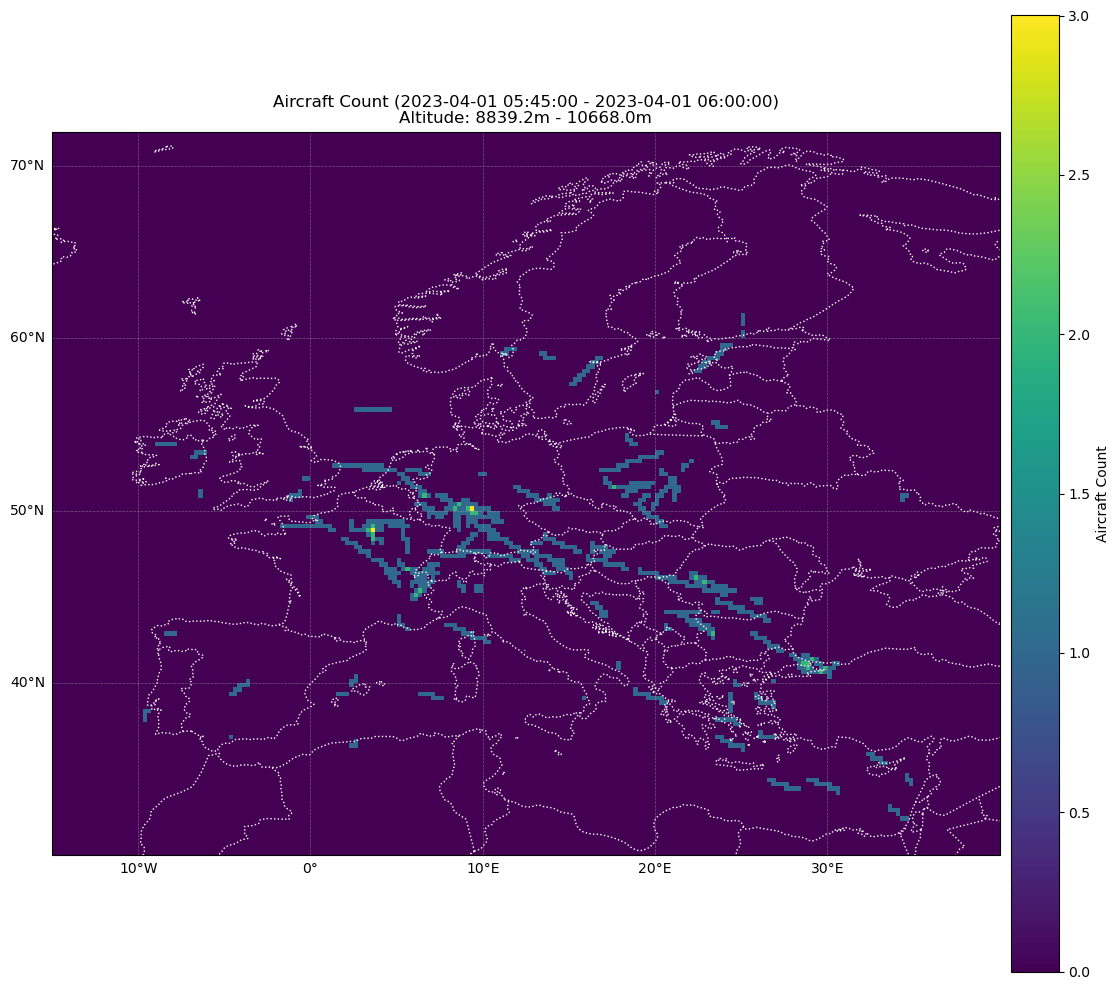

In [21]:
plot_aircraft_count(result, 15, altitude_trenches, 1)

# Temporal and Spatial Resolution Aggregation

In [22]:
def reaggregate_result(fine_result, new_window_length, new_cell_size):
    """
    Reaggregate a fine-resolution result dictionary to coarser resolution.
    
    Parameters:
      fine_result: dict with keys (window_start, alt_trench_idx, lat_idx, lon_idx)
                   and values equal to the maximum aircraft count (from the previous function).
                   Here, window_start is in seconds (15-min windows, i.e. 900 s) and the spatial
                   resolution is 0.25°.
      new_window_length: new time window length in seconds (must be an integer multiple of 900).
      new_cell_size: new spatial grid cell size in degrees (must be an integer multiple of 0.25).
    
    Returns:
      new_result: dict with keys (new_window_start, alt_trench_idx, new_lat_idx, new_lon_idx)
                  and values representing the maximum aircraft count for that aggregated bin.
                  
    Note:
      - For time: Only counts from the same original fine window (i.e. a 15-min block)
        are summed because they represent simultaneous counts.
      - If multiple fine windows fall into the same new aggregated window, then the
        final value is taken as the maximum (over those fine windows).
    """
    # Original fine resolution parameters.
    fine_window_length = 900  # seconds (15 minutes)
    fine_cell_size = 0.25     # degrees
    lat_min = 30.0
    lon_min = -15.0
    
    # Intermediate dictionary.
    # We key by (new_window_start, alt_trench_idx, new_lat_idx, new_lon_idx, original_window_start)
    # so that we sum only those fine cells that are concurrent in the same fine window.
    intermediate = {}
    
    for (window_start, alt_trench_idx, lat_idx, lon_idx), count in fine_result.items():
        # Compute the new aggregated window start.
        new_win = (window_start // new_window_length) * new_window_length
        
        # Compute the center coordinate of the fine grid cell.
        lat_center = lat_min + (lat_idx + 0.5) * fine_cell_size
        lon_center = lon_min + (lon_idx + 0.5) * fine_cell_size
        
        # Compute new spatial indices.
        new_lat_idx = int((lat_center - lat_min) // new_cell_size)
        new_lon_idx = int((lon_center - lon_min) // new_cell_size)
        
        # Group by the new spatial/time key _and_ the original window_start.
        key = (new_win, alt_trench_idx, new_lat_idx, new_lon_idx, window_start)
        intermediate[key] = intermediate.get(key, 0) + count

    # Now, for each new aggregated bin (ignoring the original window start), take the maximum sum.
    aggregated = {}
    for (new_win, alt_trench_idx, new_lat_idx, new_lon_idx, orig_win), s in intermediate.items():
        agg_key = (new_win, alt_trench_idx, new_lat_idx, new_lon_idx)
        # If multiple original fine windows fall into the same new window,
        # we take the maximum (simulating the maximum instantaneous count).
        aggregated[agg_key] = max(aggregated.get(agg_key, 0), s)
    
    return aggregated

In [23]:
new_result = reaggregate_result(result, 3600, 0.5) # hourly, 0.5 degree resolution

(<Figure size 1200x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aircraft Count (2023-04-01 10:00:00 - 2023-04-01 11:00:00)\nAltitude: 8839.2m - 10668.0m'}, xlabel='Longitude', ylabel='Latitude'>)

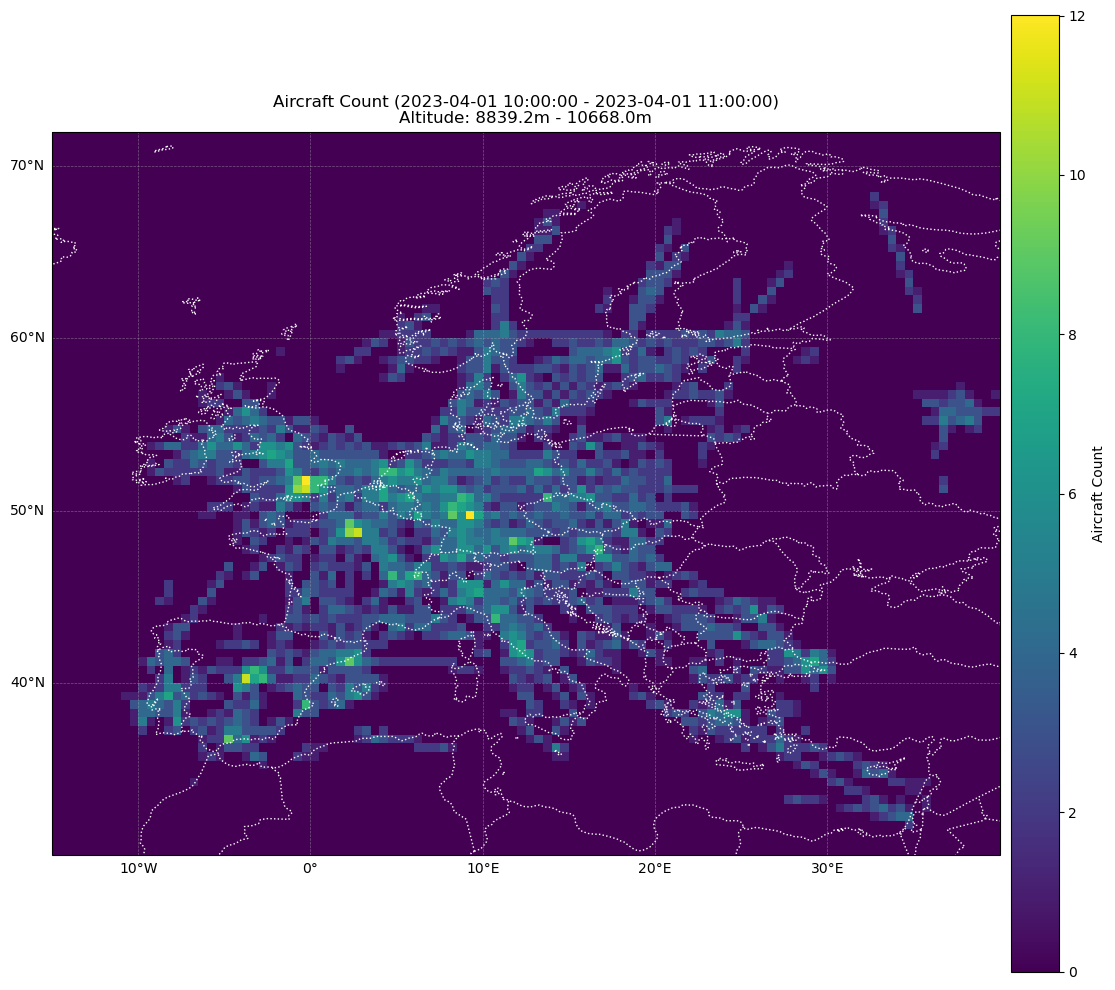

In [27]:
plot_aircraft_count(new_result, 8, altitude_trenches, 1, cell_size=0.5, window_size=3600)